In [14]:
from pandas import read_csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import PredefinedSplit
import numpy as np

In [15]:
def TwoClassConversion(outputs):
    outputs = outputs.replace(["barely-true","pants-fire"], "FALSE")
    # outputs = outputs.replace(["mostly-true"], "TRUE")
    outputs = outputs.replace(["mostly-true", "half-true"], "TRUE")
    return outputs

In [37]:
def statsAfterChanges(dataset):
    #pulls data from csv
    df = read_csv(dataset, header=None)
    
    #add labels to all the columnns 
    df.columns = ['ID', 
                'Label',
                'Statement',
                'Subject',
                'Speaker',
                'Occupation',
                'Location',
                'Party',
                'Barely True Counts',
                'False Counts',
                'Half True Counts',
                'Mostly True Counts',
                'Pants on Fire Counts',
                'Context']
    
    #drops columns that are not helpful.
    df = df.drop(['Location',
                # 'Occupation',
                'Barely True Counts',
                'False Counts',
                'Half True Counts',
                'Mostly True Counts',
                'Pants on Fire Counts'], axis=1)
    
    #drops rows that have been labeled "half-true"
    df = df.drop(df[df['Label'] == 'half-true'].index)

    #drops rows with information missing in columns
    df = df.dropna()
    
    #drops rows with duplicates 
    df = df.drop_duplicates()  

    X = df[['Statement',
            'Subject',
            'Speaker',
            'Party',
            'Occupation',
            'Context'
            ]]
        
    Y = df['Label']
    X = X.astype(str)

    # df['Combined Data'] = df['Statement'] + ' ' + df['Subject'] + ' ' + df['Speaker'] + ' ' + df['Party'] + ' ' + df['Occupation'] + ' ' + df['Context']
    # X = df['Combined Data']

    return  Y 

In [17]:
def statsBeforeChanges(dataset):
    df = read_csv(dataset, header=None)
    
    #add labels to all the columnns 
    df.columns = ['ID', 
                'Label',
                'Statement',
                'Subject',
                'Speaker',
                'Occupation',
                'Location',
                'Party',
                'Barely True Counts',
                'False Counts',
                'Half True Counts',
                'Mostly True Counts',
                'Pants on Fire Counts',
                'Context']
    
    #drops columns that are not helpful.
    df = df.drop(['Location',
                # 'Occupation',
                'Barely True Counts',
                'False Counts',
                'Half True Counts',
                'Mostly True Counts',
                'Pants on Fire Counts'], axis=1)
    
    Y = df['Label']
    
    return Y


In [39]:
def allClassesChart(Y,title):
    results = Y.to_numpy()
    y = np.array([0, 0, 0, 0, 0, 0,])
    mylabels = ["TRUE", "Mosty-True","Half-True","Barely-True","FALSE","Pants-on-Fire"]
    
    for i in range(0,len(results)):
        if results[i] == "TRUE":
            y[0] += 1
        elif results[i] == "mostly-true":
            y[1] += 1
        elif results[i] == "half-true":
            y[2] += 1
        elif results[i] == "barely-true":
            y[3] += 1
        elif results[i] == "FALSE":
            y[4] += 1
        elif results[i] == "pants-fire":
            y[5] += 1
            
    print("true: ",y[0]," mostly-true: ", y[1]," half-true: ", y[2]," barely-true: ", y[3]," FALSE: ", y[4]," pants-on-fire: ", y[5])
    # print("true: ",y[0]/(len(results))*100," false: ", (y[1]/(len(results))*100))
    #plt.bar(height = y, x = mylabels)
    plt.pie(y, labels = mylabels)
    plt.title("Six Classes Breakdown - " + title)
    plt.show()

In [42]:
def twoClassesBreakdown(dataset, title):
    data = TwoClassConversion(dataset)
    results = data.to_numpy()
    y = np.array([0, 0])
    mylabels = ["TRUE", "FALSE"]
    
    for i in range(0,len(results)):
        if results[i] == "TRUE":
            y[0] += 1
        elif results[i] == "FALSE":
            y[1] += 1
            
    print("true: ",y[0]," false: ", y[1])
    print("true: ",y[0]/(len(results))*100," false: ", (y[1]/(len(results))*100))
    
    plt.pie(y, labels = mylabels)
    plt.title("Two Classes Breakdown - " + title)
    plt.show()

Before Dropping "half-truth" label

true:  1683  mostly-true:  1966  half-true:  2123  barely-true:  1657  FALSE:  1998  pants-on-fire:  842


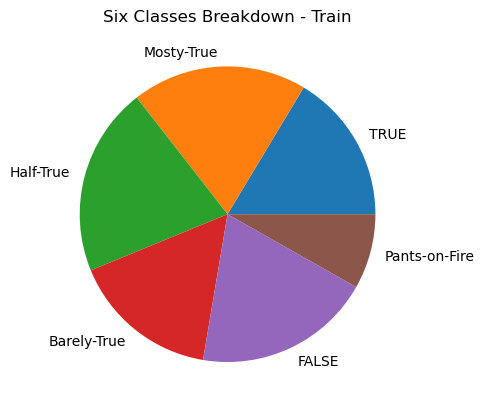


true:  211  mostly-true:  249  half-true:  267  barely-true:  214  FALSE:  250  pants-on-fire:  92


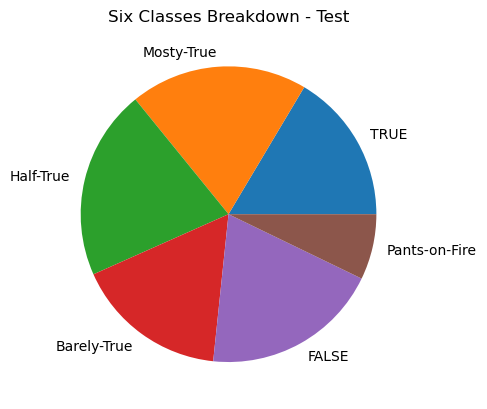


true:  169  mostly-true:  251  half-true:  248  barely-true:  237  FALSE:  263  pants-on-fire:  116


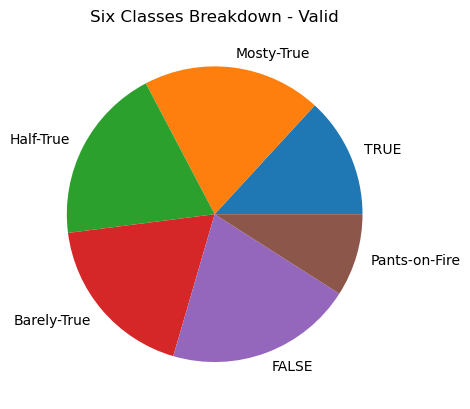

Before Dropping "half-truth" label - TwoClass

true:  5772  false:  4497
true:  56.20800467426235  false:  43.79199532573766


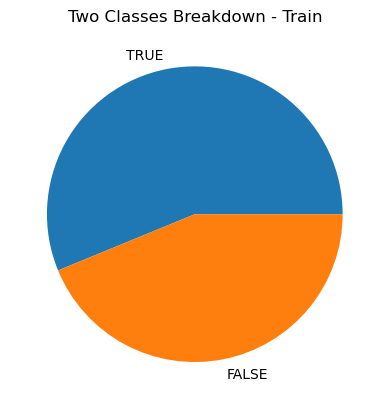


true:  727  false:  556
true:  56.66406858924395  false:  43.33593141075604


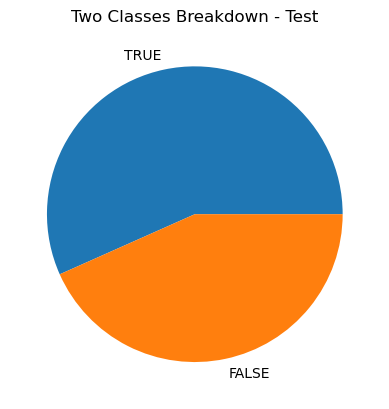


true:  668  false:  616
true:  52.024922118380054  false:  47.97507788161994


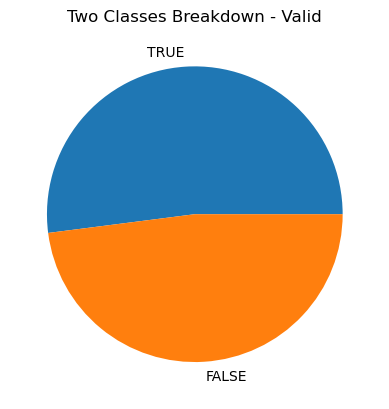

After Dropping "half-truth" label

true:  1256  mostly-true:  1462  half-true:  0  barely-true:  1132  FALSE:  1423  pants-on-fire:  500


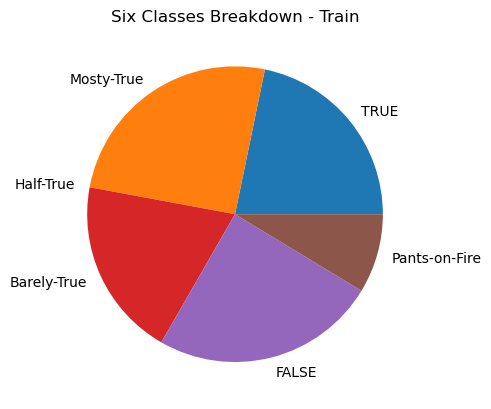


true:  162  mostly-true:  191  half-true:  0  barely-true:  153  FALSE:  183  pants-on-fire:  53


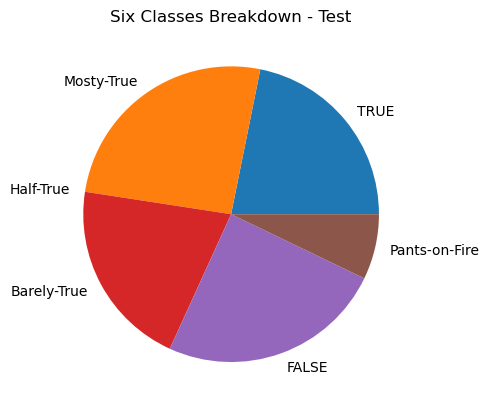


true:  130  mostly-true:  187  half-true:  0  barely-true:  169  FALSE:  189  pants-on-fire:  71


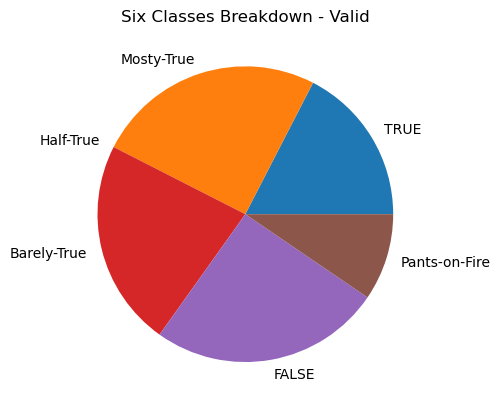

After Dropping "half-truth" label - TwoClass

true:  2718  false:  3055
true:  47.081240256365845  false:  52.918759743634155


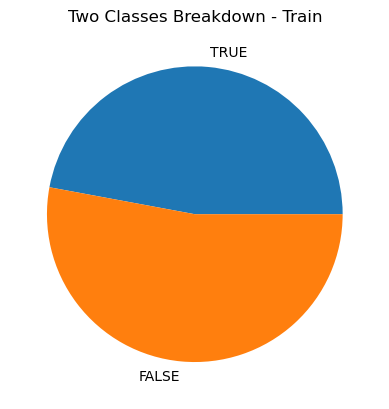


true:  353  false:  389
true:  47.57412398921833  false:  52.42587601078167


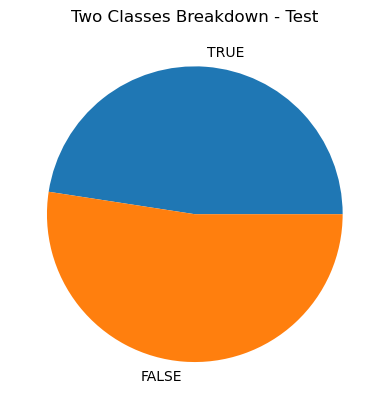


true:  317  false:  429
true:  42.493297587131366  false:  57.506702412868634


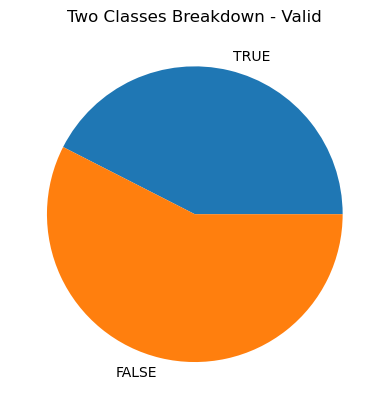

In [43]:
def main():
    print('Before Dropping "half-truth" label')
    print()
    yB = statsBeforeChanges("Dataset/Train csv_version.csv")
    allClassesChart(yB, "Train")
    print()
    tyB = statsBeforeChanges("Dataset/Test csv_version.csv")
    allClassesChart(tyB, "Test")
    print()
    vyB = statsBeforeChanges("Dataset/Valid csv_version.csv")
    allClassesChart(vyB, "Valid")
    
    print('Before Dropping "half-truth" label - TwoClass')
    print()
    twoClassesBreakdown(yB, "Train")
    print()
    twoClassesBreakdown(tyB, "Test")
    print()
    twoClassesBreakdown(vyB, "Valid")
    
    print('After Dropping "half-truth" label')
    print()
    yA = statsAfterChanges("Dataset/Train csv_version.csv")
    allClassesChart(yA, "Train")
    print()
    tyA = statsAfterChanges("Dataset/Test csv_version.csv")
    allClassesChart(tyA, "Test")
    print()
    vyA = statsAfterChanges("Dataset/Valid csv_version.csv")
    allClassesChart(vyA, "Valid")
    
    print('After Dropping "half-truth" label - TwoClass')
    print()
    twoClassesBreakdown(yA, "Train")
    print()
    twoClassesBreakdown(tyA, "Test")
    print()
    twoClassesBreakdown(vyA, "Valid")
    
main() 
    
    
   